Importing libraries

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from feature_engine.encoding import OrdinalEncoder
from feature_engine.encoding import MeanEncoder

Setting options and random seed for reproducibility

In [ ]:
pd.set_option("display.max_columns", None)

np.random.seed(42)  # dla powtarzalności wyników

Creating simple sample data frame to practise different imputation techniques

In [1]:
# Możliwe wartości kategorii
cities = ["Warszawa", "Kraków", "Wrocław", "Gdańsk"]
eye_colors = ["niebieskie", "zielone", "brązowe"]
education_levels = ["podstawowe", "średnie", "wyższe", "podyplomowe"]

# Tworzymy DataFrame
df = pd.DataFrame({
    "wiek": np.random.randint(18, 65, 20),  # dyskretna
    "wzrost_cm": np.random.normal(170, 10, 20).round(1),  # ciągła
    "dochód_mies": np.random.normal(5000, 1500, 20).round(0),  # ciągła
    "liczba_dzieci": np.random.randint(0, 4, 20),  # dyskretna
    "liczba_pokoi": np.random.randint(1, 6, 20),  # dyskretna
    "miasto": np.random.choice(cities, 20),  # nominalna
    "kolor_oczu": np.random.choice(eye_colors, 20),  # nominalna
    "wykształcenie": np.random.choice(education_levels, 20),  # porządkowa
    "ocena_usługi": np.random.randint(1, 6, 20),  # porządkowa (1–5)
    "czas_spędzony_online_h": np.random.exponential(scale=2, size=20).round(1)  # ciągła
})

# Wprowadzamy trochę braków danych losowo (~15%)
for col in df.columns:
    df.loc[df.sample(frac=0.15, random_state=np.random.randint(100)).index, col] = np.nan

NameError: name 'pd' is not defined

In [223]:
df.head(10)

,wiek,wzrost_cm,dochód_mies,liczba_dzieci,liczba_pokoi,miasto,kolor_oczu,wykształcenie,ocena_usługi,czas_spędzony_online_h
0,56.0,170.2,5849.0,0.0,3.0,NaN,niebieskie,średnie,1.0,NaN
1,NaN,165.7,3943.0,2.0,5.0,Kraków,zielone,podyplomowe,4.0,1.4
2,32.0,164.7,NaN,0.0,2.0,Wrocław,niebieskie,podyplomowe,5.0,0.7
3,60.0,168.8,4470.0,0.0,NaN,NaN,NaN,podyplomowe,1.0,0.7
4,25.0,172.2,4308.0,0.0,1.0,Kraków,brązowe,podyplomowe,3.0,0.1
5,38.0,162.3,5100.0,NaN,4.0,Wrocław,niebieskie,podyplomowe,3.0,1.9
6,56.0,171.4,4736.0,0.0,1.0,Wrocław,NaN,średnie,1.0,NaN
7,36.0,169.7,6801.0,NaN,4.0,Warszawa,brązowe,średnie,5.0,0.1
8,40.0,181.3,6048.0,0.0,2.0,NaN,niebieskie,wyższe,1.0,0.7
9,28.0,169.0,NaN,3.0,1.0,Wrocław,niebieskie,podyplomowe,3.0,4.8


In [224]:
cat_cols = [col for col in df.columns if df[col].dtype == "O" or df[col].dtype == "category"]
num_cols = [col for col in df.columns if col not in cat_cols]
print("Categorical variables:", cat_cols)
print("Numerical variables:", num_cols)

Categorical variables: ['miasto', 'kolor_oczu', 'wykształcenie']
Numerical variables: ['wiek', 'wzrost_cm', 'dochód_mies', 'liczba_dzieci', 'liczba_pokoi', 'ocena_usługi', 'czas_spędzony_online_h']


# One hot encoding

### One hot encoding with `pandas`

In [225]:
data = df.copy()

In [226]:
# kodujemy wszystkie category levels, nan też dostaje swoją dummy variable, jeśli tak chcemy
# zostaną przekodowane tylko kolumny cat_cols, więc trzeba będzie użyć concat() lub użyć parametru columns=cat_cols
cat_encoded = pd.get_dummies(data[cat_cols], dummy_na=True, dtype="int")
print(cat_encoded.shape)
cat_encoded

(20, 14)


,miasto_Gdańsk,miasto_Kraków,miasto_Warszawa,miasto_Wrocław,miasto_nan,kolor_oczu_brązowe,kolor_oczu_niebieskie,kolor_oczu_zielone,kolor_oczu_nan,wykształcenie_podstawowe,wykształcenie_podyplomowe,wykształcenie_wyższe,wykształcenie_średnie,wykształcenie_nan
0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,1,0,0,1,0,0,0
2,0,0,0,1,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,1,0,1,0,0,0
4,0,1,0,0,0,1,0,0,0,0,1,0,0,0
5,0,0,0,1,0,0,1,0,0,0,1,0,0,0
6,0,0,0,1,0,0,0,0,1,0,0,0,1,0
7,0,0,1,0,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0,1,0,1,0,0,0,0,1,0,0
9,0,0,0,1,0,0,1,0,0,0,1,0,0,0


In [227]:
# gdy podamy cały df i konkretne kolumny w parametrze columns, wtedy dostaniemy oryginalny df z zamienionymi kolumnami
# ale pozostałe, w tym wypadku numeryczne, dalej będą w df, więc nie trzeba będzie wywoływać concat()
print(len(num_cols)) # mamy 7 numerycznych
print(pd.get_dummies(data, dummy_na=True, dtype="int", columns=cat_cols).shape)
pd.get_dummies(data, dummy_na=True, dtype="int", columns=cat_cols)

7
(20, 21)


,wiek,wzrost_cm,dochód_mies,liczba_dzieci,liczba_pokoi,ocena_usługi,czas_spędzony_online_h,miasto_Gdańsk,miasto_Kraków,miasto_Warszawa,miasto_Wrocław,miasto_nan,kolor_oczu_brązowe,kolor_oczu_niebieskie,kolor_oczu_zielone,kolor_oczu_nan,wykształcenie_podstawowe,wykształcenie_podyplomowe,wykształcenie_wyższe,wykształcenie_średnie,wykształcenie_nan
0,56.0,170.2,5849.0,0.0,3.0,1.0,NaN,0,0,0,0,1,0,1,0,0,0,0,0,1,0
1,NaN,165.7,3943.0,2.0,5.0,4.0,1.4,0,1,0,0,0,0,0,1,0,0,1,0,0,0
2,32.0,164.7,NaN,0.0,2.0,5.0,0.7,0,0,0,1,0,0,1,0,0,0,1,0,0,0
3,60.0,168.8,4470.0,0.0,NaN,1.0,0.7,0,0,0,0,1,0,0,0,1,0,1,0,0,0
4,25.0,172.2,4308.0,0.0,1.0,3.0,0.1,0,1,0,0,0,1,0,0,0,0,1,0,0,0
5,38.0,162.3,5100.0,NaN,4.0,3.0,1.9,0,0,0,1,0,0,1,0,0,0,1,0,0,0
6,56.0,171.4,4736.0,0.0,1.0,1.0,NaN,0,0,0,1,0,0,0,0,1,0,0,0,1,0
7,36.0,169.7,6801.0,NaN,4.0,5.0,0.1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
8,40.0,181.3,6048.0,0.0,2.0,1.0,0.7,0,0,0,0,1,0,1,0,0,0,0,1,0,0
9,28.0,169.0,NaN,3.0,1.0,3.0,4.8,0,0,0,1,0,0,1,0,0,0,1,0,0,0


Inaczej nazywa kolumny, w zależności od tego, czy podaliśmy subset od razu, czy cały df i podaliśmy kolumny w parametrze `columns` - widać różnicę na dwóch df powyżej.

### One hot encoding with `sklearn`

In [228]:
data = df.copy()

encoder = OneHotEncoder(
    categories="auto",
    drop=None, # creates k dummy variables
    sparse_output=False, # won't create a sparse matrix
    handle_unknown="error" # will throw an error when an unknown category is met in the test set
    )

encoder.set_output(transform="pandas") # to return a DataFrame

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [229]:
# but we have to first split the data into train and test set
encoder.fit(data[cat_cols]) # jakbyśmy podali całą df, to numeryczne też by zamienił...

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [230]:
# we check the learned categories
encoder.categories_
# rozpoznało też nan jako unikalną wartość, więc też zrobi kolumnę

[array(['Gdańsk', 'Kraków', 'Warszawa', 'Wrocław', nan], dtype=object),
 array(['brązowe', 'niebieskie', 'zielone', nan], dtype=object),
 array(['podstawowe', 'podyplomowe', 'wyższe', 'średnie', nan],
       dtype=object)]

In [231]:
# tranfrorm the dataset
cat_encoded = encoder.transform(data[cat_cols])

cat_encoded # ale nie mamy pozostałych zmiennych numerycznych...

,miasto_Gdańsk,miasto_Kraków,miasto_Warszawa,miasto_Wrocław,miasto_nan,kolor_oczu_brązowe,kolor_oczu_niebieskie,kolor_oczu_zielone,kolor_oczu_nan,wykształcenie_podstawowe,wykształcenie_podyplomowe,wykształcenie_wyższe,wykształcenie_średnie,wykształcenie_nan
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Podamy teraz całą df, żeby zoabczyć, że konieczne jest użycie `ColumnTransformer`.

In [232]:
data = df.copy()

encoder = OneHotEncoder(
    categories="auto",
    drop=None, # creates k dummy variables
    sparse_output=False, # won't create a sparse matrix
    handle_unknown="error" # will throw an error when an unknown category is met in the test set
    )

encoder.set_output(transform="pandas")

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [233]:
encoder.fit(data)

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [234]:
# nauczył się też każdej wartości kolumn numerycznych...
encoder.categories_

[array([20., 25., 28., 32., 36., 38., 39., 40., 41., 53., 56., 60., 61.,
        nan]),
 array([149.7, 158.4, 159. , 162.3, 164.7, 165.7, 166.1, 168.8, 169. ,
        169.7, 170.2, 171.4, 172.2, 181.2, 181.3, 189.1,   nan]),
 array([3639., 3943., 4308., 4470., 4736., 5100., 5129., 5395., 5691.,
        5849., 6048., 6082., 6178., 6783., 6801., 7463., 8984.,   nan]),
 array([ 0.,  2.,  3., nan]),
 array([ 1.,  2.,  3.,  4.,  5., nan]),
 array(['Gdańsk', 'Kraków', 'Warszawa', 'Wrocław', nan], dtype=object),
 array(['brązowe', 'niebieskie', 'zielone', nan], dtype=object),
 array(['podstawowe', 'podyplomowe', 'wyższe', 'średnie', nan],
       dtype=object),
 array([ 1.,  2.,  3.,  4.,  5., nan]),
 array([0.1, 0.3, 0.5, 0.7, 0.9, 1.3, 1.4, 1.9, 2.2, 2.6, 2.9, 4.8, 8.5,
        nan])]

In [235]:
encoder.transform(data)

,wiek_20.0,wiek_25.0,wiek_28.0,wiek_32.0,wiek_36.0,wiek_38.0,wiek_39.0,wiek_40.0,wiek_41.0,wiek_53.0,wiek_56.0,wiek_60.0,wiek_61.0,wiek_nan,wzrost_cm_149.7,wzrost_cm_158.4,wzrost_cm_159.0,wzrost_cm_162.3,wzrost_cm_164.7,wzrost_cm_165.7,wzrost_cm_166.1,wzrost_cm_168.8,wzrost_cm_169.0,wzrost_cm_169.7,wzrost_cm_170.2,wzrost_cm_171.4,wzrost_cm_172.2,wzrost_cm_181.2,wzrost_cm_181.3,wzrost_cm_189.1,wzrost_cm_nan,dochód_mies_3639.0,dochód_mies_3943.0,dochód_mies_4308.0,dochód_mies_4470.0,dochód_mies_4736.0,dochód_mies_5100.0,dochód_mies_5129.0,dochód_mies_5395.0,dochód_mies_5691.0,dochód_mies_5849.0,dochód_mies_6048.0,dochód_mies_6082.0,dochód_mies_6178.0,dochód_mies_6783.0,dochód_mies_6801.0,dochód_mies_7463.0,dochód_mies_8984.0,dochód_mies_nan,liczba_dzieci_0.0,liczba_dzieci_2.0,liczba_dzieci_3.0,liczba_dzieci_nan,liczba_pokoi_1.0,liczba_pokoi_2.0,liczba_pokoi_3.0,liczba_pokoi_4.0,liczba_pokoi_5.0,liczba_pokoi_nan,miasto_Gdańsk,miasto_Kraków,miasto_Warszawa,miasto_Wrocław,miasto_nan,kolor_oczu_brązowe,kolor_oczu_niebieskie,kolor_oczu_zielone,kolor_oczu_nan,wykształcenie_podstawowe,wykształcenie_podyplomowe,wykształcenie_wyższe,wykształcenie_średnie,wykształcenie_nan,ocena_usługi_1.0,ocena_usługi_2.0,ocena_usługi_3.0,ocena_usługi_4.0,ocena_usługi_5.0,ocena_usługi_nan,czas_spędzony_online_h_0.1,czas_spędzony_online_h_0.3,czas_spędzony_online_h_0.5,czas_spędzony_online_h_0.7,czas_spędzony_online_h_0.9,czas_spędzony_online_h_1.3,czas_spędzony_online_h_1.4,czas_spędzony_online_h_1.9,czas_spędzony_online_h_2.2,czas_spędzony_online_h_2.6,czas_spędzony_online_h_2.9,czas_spędzony_online_h_4.8,czas_spędzony_online_h_8.5,czas_spędzony_online_h_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [236]:
encoder.transform(data).shape

(20, 93)

Dostaliśmy 93 zmienne! No nie o to chodziło... Teraz z `ColumnTransformer`:

In [237]:
data = df.copy()

encoder = OneHotEncoder(
    categories="auto",
    drop=None, # creates k dummy variables
    sparse_output=False, # won't create a sparse matrix
    handle_unknown="error" # will throw an error when an unknown category is met in the test set
    )

In [238]:
ct = ColumnTransformer(
    [("encoder", encoder, cat_cols)], remainder="passthrough"
)

ct.set_output(transform="pandas")

,transformers,"[('encoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,False


In [239]:
ct.fit(data)

,transformers,"[('encoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,False


In [240]:
ct.transformers

[('encoder',
  OneHotEncoder(sparse_output=False),
  ['miasto', 'kolor_oczu', 'wykształcenie'])]

In [241]:
# and named transformers which is a dictionary
ct.named_transformers_["encoder"]

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [242]:
data_encoded = ct.transform(data)

data_encoded

,encoder__miasto_Gdańsk,encoder__miasto_Kraków,encoder__miasto_Warszawa,encoder__miasto_Wrocław,encoder__miasto_nan,encoder__kolor_oczu_brązowe,encoder__kolor_oczu_niebieskie,encoder__kolor_oczu_zielone,encoder__kolor_oczu_nan,encoder__wykształcenie_podstawowe,encoder__wykształcenie_podyplomowe,encoder__wykształcenie_wyższe,encoder__wykształcenie_średnie,encoder__wykształcenie_nan,remainder__wiek,remainder__wzrost_cm,remainder__dochód_mies,remainder__liczba_dzieci,remainder__liczba_pokoi,remainder__ocena_usługi,remainder__czas_spędzony_online_h
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,56.0,170.2,5849.0,0.0,3.0,1.0,NaN
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,165.7,3943.0,2.0,5.0,4.0,1.4
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,32.0,164.7,NaN,0.0,2.0,5.0,0.7
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,60.0,168.8,4470.0,0.0,NaN,1.0,0.7
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25.0,172.2,4308.0,0.0,1.0,3.0,0.1
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,38.0,162.3,5100.0,NaN,4.0,3.0,1.9
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,56.0,171.4,4736.0,0.0,1.0,1.0,NaN
7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,36.0,169.7,6801.0,NaN,4.0,5.0,0.1
8,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40.0,181.3,6048.0,0.0,2.0,1.0,0.7
9,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,28.0,169.0,NaN,3.0,1.0,3.0,4.8


Powyżej widzimy, że 
- output to df
- zmienne zaenkodowane są na początku df
- `nan` też dostał swoje dummy variables
- dodany został prefiks "encoder_", czyli z nazwą, którą nadaliśmy naszemu OneHotEncoder w ColumnTransformer i dla pozostałych zmiennych dodany został prefiks "remainder_", czyli tak jak w przypadku imputacji z ct się działo

My first **pipeline** - imputation and encoding, ale bez `train_test_split`

In [243]:
data = df.copy()

We will set up a pipeline to impute missing values in categorical variables with "missing" and then encode those variables using one hot encoding.

In [244]:
pipe = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
        ("encoder", encoder) # ten co już jest zdefiniowany wyżej
    ]
)

In [245]:
# select the variables to transform (impute and encode)
ct = ColumnTransformer(
    [("transformer", pipe, cat_cols)], remainder="passthrough"
)
ct.set_output(transform="pandas")

,transformers,"[('transformer', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'constant'
,fill_value,'missing'


In [246]:
ct.fit(data)

,transformers,"[('transformer', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'constant'
,fill_value,'missing'


In [247]:
ct.named_transformers_

{'transformer': Pipeline(steps=[('imputer',
                  SimpleImputer(fill_value='missing', strategy='constant')),
                 ('encoder', OneHotEncoder(sparse_output=False))]),
 'remainder': FunctionTransformer(accept_sparse=True, check_inverse=False,
                     feature_names_out='one-to-one')}

In [248]:
data_imputed_and_encoded = ct.transform(data)
data_imputed_and_encoded

,transformer__miasto_Gdańsk,transformer__miasto_Kraków,transformer__miasto_Warszawa,transformer__miasto_Wrocław,transformer__miasto_missing,transformer__kolor_oczu_brązowe,transformer__kolor_oczu_missing,transformer__kolor_oczu_niebieskie,transformer__kolor_oczu_zielone,transformer__wykształcenie_missing,transformer__wykształcenie_podstawowe,transformer__wykształcenie_podyplomowe,transformer__wykształcenie_wyższe,transformer__wykształcenie_średnie,remainder__wiek,remainder__wzrost_cm,remainder__dochód_mies,remainder__liczba_dzieci,remainder__liczba_pokoi,remainder__ocena_usługi,remainder__czas_spędzony_online_h
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,56.0,170.2,5849.0,0.0,3.0,1.0,NaN
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,165.7,3943.0,2.0,5.0,4.0,1.4
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,32.0,164.7,NaN,0.0,2.0,5.0,0.7
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,60.0,168.8,4470.0,0.0,NaN,1.0,0.7
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,25.0,172.2,4308.0,0.0,1.0,3.0,0.1
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,38.0,162.3,5100.0,NaN,4.0,3.0,1.9
6,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,56.0,171.4,4736.0,0.0,1.0,1.0,NaN
7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,36.0,169.7,6801.0,NaN,4.0,5.0,0.1
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,40.0,181.3,6048.0,0.0,2.0,1.0,0.7
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,28.0,169.0,NaN,3.0,1.0,3.0,4.8


### One hot encoding with `feature-engine`

In [249]:
from feature_engine.encoding import OneHotEncoder

ohe = OneHotEncoder(top_categories=None,drop_last=False, drop_last_binary=False, variables=cat_cols)
# ohe.fit(data)
# są braki w 'data', więc nie możemy zastować 

In [250]:
# szybkie imputowanie tylko tych categorical variables
data = data.fillna({cat:"missing" for cat in cat_cols})

In [251]:
ohe.fit(data)

,top_categories,None
,drop_last,False
,drop_last_binary,False
,variables,"['miasto', 'kolor_oczu', ...]"
,ignore_format,False


In [252]:
ohe.variables_

['miasto', 'kolor_oczu', 'wykształcenie']

In [253]:
ohe.encoder_dict_

{'miasto': ['missing', 'Kraków', 'Wrocław', 'Warszawa', 'Gdańsk'],
 'kolor_oczu': ['niebieskie', 'zielone', 'missing', 'brązowe'],
 'wykształcenie': ['średnie',
  'podyplomowe',
  'wyższe',
  'missing',
  'podstawowe']}

In [254]:
data_encoded = ohe.transform(data)
data_encoded

,wiek,wzrost_cm,dochód_mies,liczba_dzieci,liczba_pokoi,ocena_usługi,czas_spędzony_online_h,miasto_missing,miasto_Kraków,miasto_Wrocław,miasto_Warszawa,miasto_Gdańsk,kolor_oczu_niebieskie,kolor_oczu_zielone,kolor_oczu_missing,kolor_oczu_brązowe,wykształcenie_średnie,wykształcenie_podyplomowe,wykształcenie_wyższe,wykształcenie_missing,wykształcenie_podstawowe
0,56.0,170.2,5849.0,0.0,3.0,1.0,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1,NaN,165.7,3943.0,2.0,5.0,4.0,1.4,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,32.0,164.7,NaN,0.0,2.0,5.0,0.7,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,60.0,168.8,4470.0,0.0,NaN,1.0,0.7,1,0,0,0,0,0,0,1,0,0,1,0,0,0
4,25.0,172.2,4308.0,0.0,1.0,3.0,0.1,0,1,0,0,0,0,0,0,1,0,1,0,0,0
5,38.0,162.3,5100.0,NaN,4.0,3.0,1.9,0,0,1,0,0,1,0,0,0,0,1,0,0,0
6,56.0,171.4,4736.0,0.0,1.0,1.0,NaN,0,0,1,0,0,0,0,1,0,1,0,0,0,0
7,36.0,169.7,6801.0,NaN,4.0,5.0,0.1,0,0,0,1,0,0,0,0,1,1,0,0,0,0
8,40.0,181.3,6048.0,0.0,2.0,1.0,0.7,1,0,0,0,0,1,0,0,0,0,0,1,0,0
9,28.0,169.0,NaN,3.0,1.0,3.0,4.8,0,0,1,0,0,1,0,0,0,0,1,0,0,0


# Label / ordinal / integers encoding

### Label encoding in `pandas`

In [255]:
data = df.copy()
# cat_cols bez zmian te same, braki w danych te same

In [256]:
# sprawdzimy, ile jest unikalnych kategorii w każdej kolumnie kategorialnej
for col in cat_cols:
    print("Number of distinct labels in", col, ":", len(data[col].unique()))
    print(data[col].unique())
    print("__________")

Number of distinct labels in miasto : 5
[nan 'Kraków' 'Wrocław' 'Warszawa' 'Gdańsk']
__________
Number of distinct labels in kolor_oczu : 4
['niebieskie' 'zielone' nan 'brązowe']
__________
Number of distinct labels in wykształcenie : 5
['średnie' 'podyplomowe' 'wyższe' nan 'podstawowe']
__________


In [257]:
mapping_dict = {}
for label, i in enumerate(data["miasto"].unique()):
    mapping_dict[label] = i

print(mapping_dict)

{0: nan, 1: 'Kraków', 2: 'Wrocław', 3: 'Warszawa', 4: 'Gdańsk'}


In [258]:
# zrobimy funkcję, która stworzy słownik dla danej df i podanej kolumny
def create_mapping_dict(df, col):
    return {label: i for i, label in enumerate(data[col].unique())}

create_mapping_dict(data, "miasto")

{nan: 0, 'Kraków': 1, 'Wrocław': 2, 'Warszawa': 3, 'Gdańsk': 4}

In [259]:
# .map() na Series mapuje wartości ze słownika, keys to wartości z Series, a values to nowe wartości
data["kolor_oczu"] = data["kolor_oczu"].map(create_mapping_dict(data, "kolor_oczu"))
#data

Znowu wywołamy `data = df.copy()` i napiszemy funkcję, która będzie zamieniać wartości z pomocą `.map()` i będzie w środku wywoływać funkcję tworzącą mapping_dict.

In [260]:
data = df.copy()
data.head()

,wiek,wzrost_cm,dochód_mies,liczba_dzieci,liczba_pokoi,miasto,kolor_oczu,wykształcenie,ocena_usługi,czas_spędzony_online_h
0,56.0,170.2,5849.0,0.0,3.0,NaN,niebieskie,średnie,1.0,NaN
1,NaN,165.7,3943.0,2.0,5.0,Kraków,zielone,podyplomowe,4.0,1.4
2,32.0,164.7,NaN,0.0,2.0,Wrocław,niebieskie,podyplomowe,5.0,0.7
3,60.0,168.8,4470.0,0.0,NaN,NaN,NaN,podyplomowe,1.0,0.7
4,25.0,172.2,4308.0,0.0,1.0,Kraków,brązowe,podyplomowe,3.0,0.1


In [261]:
def encode_cat_cols(df):
    columns_to_encode = [col for col in df.columns if df[col].dtype == "O"]
    #print(columns_to_encode)
    for col in columns_to_encode:
        df[col] = df[col].map(create_mapping_dict(df, col))
    return df
data = encode_cat_cols(data)
data.head()

,wiek,wzrost_cm,dochód_mies,liczba_dzieci,liczba_pokoi,miasto,kolor_oczu,wykształcenie,ocena_usługi,czas_spędzony_online_h
0,56.0,170.2,5849.0,0.0,3.0,0,0,0,1.0,NaN
1,NaN,165.7,3943.0,2.0,5.0,1,1,1,4.0,1.4
2,32.0,164.7,NaN,0.0,2.0,2,0,1,5.0,0.7
3,60.0,168.8,4470.0,0.0,NaN,0,2,1,1.0,0.7
4,25.0,172.2,4308.0,0.0,1.0,1,3,1,3.0,0.1


### Label encoding in `sklearn`

In [262]:
from sklearn.preprocessing import OrdinalEncoder

In [263]:
data = df.copy()

In [264]:
# wybieramy kategorialne zmienne - te same, co wcześniej, czyli cat_cols

# we set yp the encoder
encoder = OrdinalEncoder(categories="auto", dtype=np.float64, handle_unknown="error")

Co oznacza parametr `categories="auto"`?
- scikit-learn sam znajdzie wszystkie unikalne wartości w kolumnie na etapie fit()
- i posortuje je alfabetycznie/rosnąco
- a potem przypisze im kolejne liczby: 0, 1, 2, ...

Możemy podać własną listę np. u mnie z wykształceniem: `categories=["podstawowe", "średnie", "wyższe", "podyplomowe"]` - tylko my jeszcze mamy `np.nan`, ale dobra, to trzeba by najpierw imputować.

Możemy też zamiast raise error przy unknown value w test set podać arbitrary value w parametrze `handle_unknown="use_encoded_vale"` i podać tę wartość w parametrze `unknown_value=a`.

In [265]:
# we set up the column transformer, so we can encode only cat_cols
ct = ColumnTransformer(
    [("oe", encoder, cat_cols)], remainder="passthrough"
)

ct.set_output(transform="pandas")

,transformers,"[('oe', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'


**OCZYWIEŚCIE NORMALNIE ROBIMY FIT NA TRAIN SET**

In [266]:
ct.fit(data)

,transformers,"[('oe', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'


In [267]:
ct.named_transformers_["oe"].categories_
# nie podaliśmy konkretnej kolejności kategorii, więc 
# "wykształcenie" nie będzie zakodowane wg rosnącego (ani malejącego) porządku

[array(['Gdańsk', 'Kraków', 'Warszawa', 'Wrocław', nan], dtype=object),
 array(['brązowe', 'niebieskie', 'zielone', nan], dtype=object),
 array(['podstawowe', 'podyplomowe', 'wyższe', 'średnie', nan],
       dtype=object)]

To zróbmy dwa encodery w column transformer. Osobny dla "wykształcenie" i osobny dla dwóch pozostałych zmiennych kategorialnych. Dodatkowo zróbmy, żeby braki dostały wartość 99.

In [268]:
encoder_wyksztalcenie = OrdinalEncoder(categories=[["podstawowe", "średnie", "wyższe", "podyplomowe", np.nan]],
                                       handle_unknown="error", encoded_missing_value=-9)
encoder = OrdinalEncoder(categories="auto",handle_unknown="error", encoded_missing_value=-9)

In [269]:
ct = ColumnTransformer(
    [
        ("oe_w", encoder_wyksztalcenie, ["wykształcenie"]),
        ("oe", encoder, ["miasto", "kolor_oczu"])
    ],
    remainder="passthrough"
)

ct.set_output(transform="pandas")

,transformers,"[('oe_w', ...), ('oe', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,"[['podstawowe', 'średnie', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'


In [270]:
ct.fit(data)

,transformers,"[('oe_w', ...), ('oe', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,"[['podstawowe', 'średnie', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'


In [271]:
data_encoded = ct.transform(data)
data_encoded.head()

,oe_w__wykształcenie,oe__miasto,oe__kolor_oczu,remainder__wiek,remainder__wzrost_cm,remainder__dochód_mies,remainder__liczba_dzieci,remainder__liczba_pokoi,remainder__ocena_usługi,remainder__czas_spędzony_online_h
0,1.0,-9.0,1.0,56.0,170.2,5849.0,0.0,3.0,1.0,NaN
1,3.0,1.0,2.0,NaN,165.7,3943.0,2.0,5.0,4.0,1.4
2,3.0,3.0,1.0,32.0,164.7,NaN,0.0,2.0,5.0,0.7
3,3.0,-9.0,-9.0,60.0,168.8,4470.0,0.0,NaN,1.0,0.7
4,3.0,1.0,0.0,25.0,172.2,4308.0,0.0,1.0,3.0,0.1


In [272]:
data.head()

,wiek,wzrost_cm,dochód_mies,liczba_dzieci,liczba_pokoi,miasto,kolor_oczu,wykształcenie,ocena_usługi,czas_spędzony_online_h
0,56.0,170.2,5849.0,0.0,3.0,NaN,niebieskie,średnie,1.0,NaN
1,NaN,165.7,3943.0,2.0,5.0,Kraków,zielone,podyplomowe,4.0,1.4
2,32.0,164.7,NaN,0.0,2.0,Wrocław,niebieskie,podyplomowe,5.0,0.7
3,60.0,168.8,4470.0,0.0,NaN,NaN,NaN,podyplomowe,1.0,0.7
4,25.0,172.2,4308.0,0.0,1.0,Kraków,brązowe,podyplomowe,3.0,0.1


Chyba działa :))

In [273]:
ct.named_transformers_["oe_w"].categories_

[array(['podstawowe', 'średnie', 'wyższe', 'podyplomowe', nan],
       dtype=object)]

In [274]:
ct.named_transformers_["oe"].categories_

[array(['Gdańsk', 'Kraków', 'Warszawa', 'Wrocław', nan], dtype=object),
 array(['brązowe', 'niebieskie', 'zielone', nan], dtype=object)]

# Count or frequency encoding

### Count or frequency encoding in `pandas`

In [275]:
data = df.copy()

In [276]:
count_map_miasto = data["miasto"].value_counts().to_dict()
# braki raczej będą uzupełnione najpierw, ale jako ćwiczonko też ujdzie
count_map_miasto[np.nan] = -9
data["miasto"] = data["miasto"].map(count_map_miasto)
data.head()

,wiek,wzrost_cm,dochód_mies,liczba_dzieci,liczba_pokoi,miasto,kolor_oczu,wykształcenie,ocena_usługi,czas_spędzony_online_h
0,56.0,170.2,5849.0,0.0,3.0,-9,niebieskie,średnie,1.0,NaN
1,NaN,165.7,3943.0,2.0,5.0,4,zielone,podyplomowe,4.0,1.4
2,32.0,164.7,NaN,0.0,2.0,7,niebieskie,podyplomowe,5.0,0.7
3,60.0,168.8,4470.0,0.0,NaN,-9,NaN,podyplomowe,1.0,0.7
4,25.0,172.2,4308.0,0.0,1.0,4,brązowe,podyplomowe,3.0,0.1


`data["miasto"].value_counts(normalize=True).to_dict()` -> frequency

### Nie ma count / frequency encoding w sklearn

### Count or frequency encoding in `feature-engine`

In [277]:
data = df.copy()

# szybka imputacja, bo `CountFrequencyEncoder` wywali błąd lub warning, jak będą nan
data[cat_cols] = data[cat_cols].fillna("missing")

In [278]:
from feature_engine.encoding import CountFrequencyEncoder

In [279]:
# domyślnie jest encoding_method="count"
count_encoder = CountFrequencyEncoder(encoding_method="frequency", 
                                      variables=cat_cols, missing_values="raise")
count_encoder.fit(data)

,encoding_method,'frequency'
,variables,"['miasto', 'kolor_oczu', ...]"
,missing_values,'raise'
,ignore_format,False
,unseen,'ignore'


In [280]:
data = count_encoder.transform(data)
data.head()

,wiek,wzrost_cm,dochód_mies,liczba_dzieci,liczba_pokoi,miasto,kolor_oczu,wykształcenie,ocena_usługi,czas_spędzony_online_h
0,56.0,170.2,5849.0,0.0,3.0,0.15,0.40,0.25,1.0,NaN
1,NaN,165.7,3943.0,2.0,5.0,0.20,0.25,0.30,4.0,1.4
2,32.0,164.7,NaN,0.0,2.0,0.35,0.40,0.30,5.0,0.7
3,60.0,168.8,4470.0,0.0,NaN,0.15,0.15,0.30,1.0,0.7
4,25.0,172.2,4308.0,0.0,1.0,0.20,0.20,0.30,3.0,0.1


In [281]:
count_encoder.encoder_dict_

{'miasto': {'Wrocław': 0.35,
  'Kraków': 0.2,
  'missing': 0.15,
  'Warszawa': 0.15,
  'Gdańsk': 0.15},
 'kolor_oczu': {'niebieskie': 0.4,
  'zielone': 0.25,
  'brązowe': 0.2,
  'missing': 0.15},
 'wykształcenie': {'podyplomowe': 0.3,
  'średnie': 0.25,
  'wyższe': 0.2,
  'missing': 0.15,
  'podstawowe': 0.1}}

# Ordered label encoding

Categories are replaced by integers from $1$ to $k$, where $k$ is the number of distinct categories of the variable, but this numbering is informed (=oparty na wiedzy) by the mean of the target for each category.

### Ordered label encoding in `pandas`

Policzymy sobie średnie naszego targetu, czyli czasu spędzonego online w godzinach, w zależności od kategorii danej zmiennej. Mamy trzy zmienne, więc zrobimy jakąś pętlę, żeby wyplotować trzy wykresy.

In [282]:
data = df.copy()

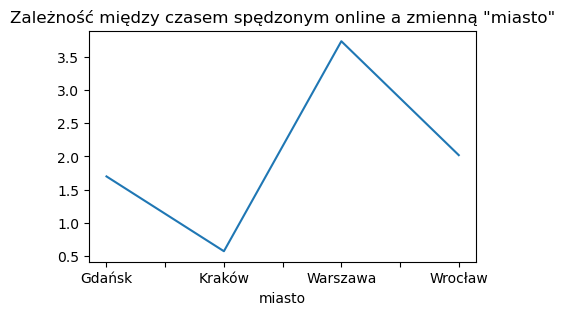

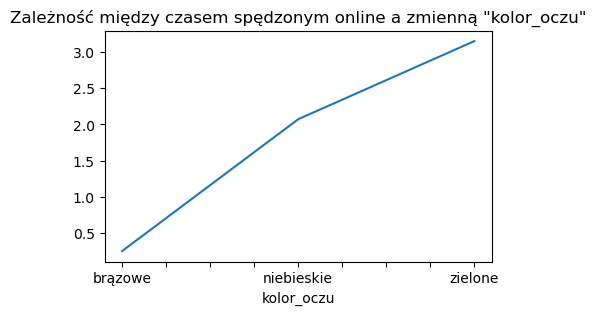

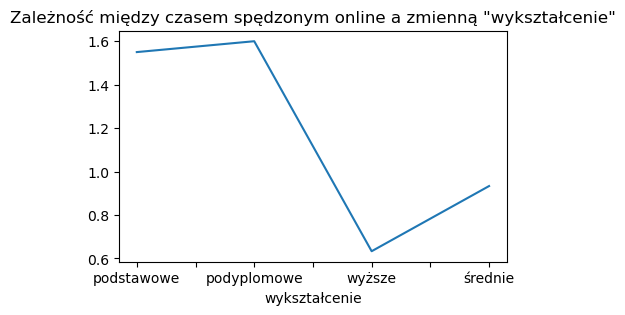

In [283]:
for var in cat_cols:
    fig = plt.figure(figsize=(5,3))
    data.groupby(var)["czas_spędzony_online_h"].mean().plot()
    plt.title('Zależność między czasem spędzonym online a zmienną "{}"'.format(var))
    plt.show()

So how to extract mapping? We need to count target means per each category for each categorical variable, then we have to sort the means and create a dictionary so that we can map those new ordered values to the variable.

In [284]:
# we need index order from the Series
# średnie uporządkowane rosnąco - default dla sort_values()
miasto_indexes = data.groupby("miasto")["czas_spędzony_online_h"].mean().sort_values().index

In [285]:
miasto_dict = {k: i for i, k in enumerate(miasto_indexes, 1)}
miasto_dict

{'Kraków': 1, 'Gdańsk': 2, 'Wrocław': 3, 'Warszawa': 4}

In [286]:
# i robimy mapping przy użyciu tego słownika
data["miasto"] = data["miasto"].map(miasto_dict)
#data

Teraz sprawdzimy, jak na wykresie prezentują się średnie targetu dla poszczególnych kategorii zmiennej "miasto" zaenkodowanej.

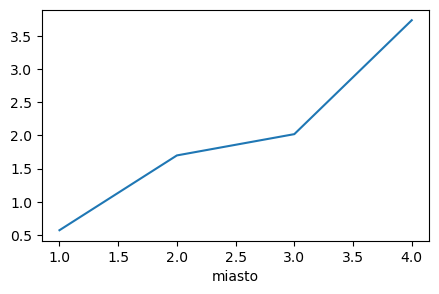

In [287]:
fig = plt.figure(figsize=(5,3))
data.groupby("miasto")["czas_spędzony_online_h"].mean().plot()
plt.show()

## Teraz trzeba by było sprawdzić na test set !! 
Bo to że wyszło na danych treningowych, to wiadomo. Jeśli na testowych danych okaże się, że nie ma zależności, to być może ta zmienna nie ma żadnej predictive value, jeśli chodzi o modele liniowe.

### Ordered label encoding in `feature-engine`

The `OrdinalEncoder()` replaces categories by ordinal numbers (0, 1, 2, 3, etc). The numbers can be ordered based on the mean of the target per category, or assigned arbitrarily.

In [288]:
data = df.copy()

In [289]:
ordinal_enc = OrdinalEncoder(encoding_method="ordered",
                             variables=cat_cols, missing_values="ignore")
# missing_values="ignore", żeby nie krzyczało teraz, jak sobie ćwiczę

TypeError: OrdinalEncoder.__init__() got an unexpected keyword argument 'encoding_method'

In [ ]:
# musimy stworzyć df, gdzie będą zmienne i osobną Series na target
X = data[[col for col in data.columns if col != "czas_spędzony_online_h"]]
# uzupełnimy braki zerami, bo krzyczy
y = data["czas_spędzony_online_h"].fillna(0)
ordinal_enc.fit(X, y)

,encoding_method,'ordered'
,variables,"['miasto', 'kolor_oczu', ...]"
,missing_values,'ignore'
,ignore_format,False
,unseen,'ignore'


In [ ]:
ordinal_enc.encoder_dict_
# mogą się różnić, bo w targecie nan uzułepnione zerami, pandas pomijał nan, przy liczeniu średnich

{'miasto': {'Kraków': 0, 'Wrocław': 1, 'Gdańsk': 2, 'Warszawa': 3},
 'kolor_oczu': {'brązowe': 0, 'niebieskie': 1, 'zielone': 2},
 'wykształcenie': {'wyższe': 0,
  'średnie': 1,
  'podstawowe': 2,
  'podyplomowe': 3}}

In [ ]:
X = ordinal_enc.transform(X)
#X

c:\Users\Joanna\anaconda3\Lib\site-packages\feature_engine\encoding\base_encoder.py:260: UserWarning: During the encoding, NaN values were introduced in the feature(s) miasto, kolor_oczu, wykształcenie.
  warnings.warn(


# Mean encoding

### Mean encoding in `pandas`

Almost the same as ordinal label encoding but with one line of code less.

In [ ]:
data = df.copy()

Quick remainder: tu należałoby wyplotować średnie targetu w zależności od kategorii danej zmiennej, ale to już było wyżej.

In [ ]:
# tu już nie musimy sortować i brać indeksów, od razu do słownika
miasto_dict = data.groupby("miasto")["czas_spędzony_online_h"].mean().to_dict()
miasto_dict

{'Gdańsk': 1.7,
 'Kraków': 0.575,
 'Warszawa': 3.733333333333333,
 'Wrocław': 2.02}

In [ ]:
# i mapujemy
data["miasto"] = data["miasto"].map(miasto_dict)
#data

I tutaj ponownie należałoby zrobić mapowanie na danych testowych i następnie zrobić wykres, żeby potwierdzić, czy jest zależność.

### Mean encoding in `feature-engine` and `categorical-encoders`

No już mi się nie chce tego klikać. Tylko tworzymy obiekt, fit i transform.

# Mean encoding with smoothing

nic ni ma
___

# Rare labels
# One hot encoding of top categories
### One hot encoding of top categories in `pandas`

In [310]:
data = df.copy()

In [311]:
# sprawdzimy, ile kategorii mają zmienne kategorialne
for cat_col in cat_cols:
    print(f"Kolumna {cat_col} ma {len(data[cat_col].unique())} unikalnych wartości.")

Kolumna miasto ma 5 unikalnych wartości.
Kolumna kolor_oczu ma 4 unikalnych wartości.
Kolumna wykształcenie ma 5 unikalnych wartości.


Więc bez sensu tutaj robić OHE of top categories, ale poćwiczymy sobie xd

In [312]:
# policzymy, które kategorie są najliczniejsze dla kolumny "miasto"
print(data["miasto"].value_counts().sort_values(ascending=False))
data["miasto"].value_counts().sort_values(ascending=False).index # to nie jest lista, więc chcemy z tego zrobić listę
lista_miasto = [c for c in data["miasto"].value_counts().sort_values(ascending=False).index]
lista_miasto # tera mamy listę kategorii uporządkowanych od najliczniejszej do najmniej licznej

miasto
Wrocław     7
Kraków      4
Warszawa    3
Gdańsk      3
Name: count, dtype: int64


['Wrocław', 'Kraków', 'Warszawa', 'Gdańsk']

To jest bez sensu, ale powiedzmy, że chcemy brać pod uwagę tylko kategorie, które mają co najmniej 4 obserwacje, pozostałe uznajemy za rare labels. Potrzebujemy teraz za pomocą `np.where` stworzyć sami dummy variables, w tym wypadku 2 dummies

In [313]:
# to bierzemy dwie pierwsze labels
top_miasto = [t for t in data["miasto"].value_counts().sort_values(ascending=False).head(2).index]
top_miasto

['Wrocław', 'Kraków']

In [314]:
for label in top_miasto:
    data["miasto_" + label] = np.where(data["miasto"]==label, 1, 0)

In [318]:
data[[col for col in data.columns if "miasto" in col]] 
# NaN, Warszawa i Gdańsk mają zera w obu nowych dummies

,miasto,miasto_Wrocław,miasto_Kraków
0,NaN,0,0
1,Kraków,0,1
2,Wrocław,1,0
3,NaN,0,0
4,Kraków,0,1
5,Wrocław,1,0
6,Wrocław,1,0
7,Warszawa,0,0
8,NaN,0,0
9,Wrocław,1,0


Teraz zrobimy funkcje, żeby automatycznie powyższe wykonywało się dla każdej kategorialnej zmiennej.

In [320]:
data = df.copy()

In [ ]:
# funkcja, która będzie zwracała listę m najliczniejszych kategorii danej zmiennej
def top_labels(df, variable, num_labels):
    top_categories = [label for label in df[variable].value_counts().sort_values(ascending=False).head(num_labels).index]
    return top_categories
# ok, działa

In [328]:
output = top_labels(data, "kolor_oczu", 2)
output

['niebieskie', 'zielone']

In [329]:
data["kolor_oczu"].value_counts().sort_values(ascending=False)

kolor_oczu
niebieskie    8
zielone       5
brązowe       4
Name: count, dtype: int64

In [331]:
# funkcja, która będzie brała output listę z funkcji wyżej i tworzyła m dummy variables
def top_label_dummies(df, variable, top_categories):
    for category in top_categories:
        df[variable + "_" + category] = np.where(df[variable]==category, 1, 0)

In [332]:
for cat_col in cat_cols:
    top_categories = top_labels(data, cat_col, 2)
    top_label_dummies(data, cat_col, top_categories=top_categories)

In [338]:
data[[col for col in data.columns if "wykształcenie" in col]]
# no działają te dwie funkcje w pętli

,wykształcenie,wykształcenie_podyplomowe,wykształcenie_średnie
0,średnie,0,1
1,podyplomowe,1,0
2,podyplomowe,1,0
3,podyplomowe,1,0
4,podyplomowe,1,0
5,podyplomowe,1,0
6,średnie,0,1
7,średnie,0,1
8,wyższe,0,0
9,podyplomowe,1,0
